In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np
import os

In [2]:
ii = 5
runs = [102,106,107,108,111,121,122]
data_dir = '/reg/d/psdm/cxi/cxilr6716/scratch/combined_tables/gai/'
fname = os.path.join(data_dir,'run%d.tbl'%runs[ii])
f= h5py.File(fname,'r')
f.keys()
imgs = f['polar_imgs'][:5000]
mask = f['polar_mask_binned'].value
print f['polar_imgs']
mask = (mask==mask.max())

data_dir = '/reg/d/psdm/cxi/cxilr6716/scratch/combined_tables/cali_gai/'
fname = os.path.join(data_dir,'run%d.tbl'%runs[ii])
f= h5py.File(fname,'r')
f.keys()
imgs2 = f['polar_imgs'][:5000]
mask2 = f['polar_mask_binned'].value
print f['polar_imgs']
mask2 = (mask2==mask2.max())


<HDF5 dataset "polar_imgs": shape (154165, 50, 326), type "<f4">
<HDF5 dataset "polar_imgs": shape (136822, 50, 326), type "<f4">


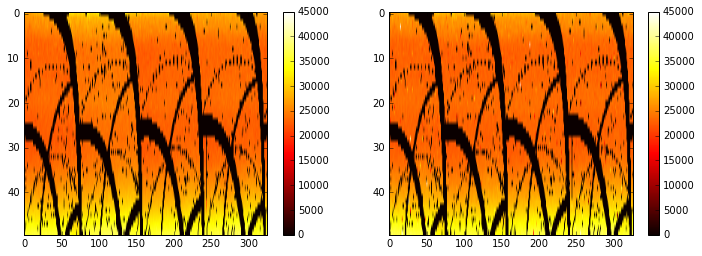

In [3]:
plt.figure(figsize = [12,4])
plt.subplot(121)
plt.imshow(imgs.mean(0)*mask,aspect='auto',vmin = 0, vmax = 4.5e4,
          cmap='hot')
plt.colorbar()
plt.subplot(122)
plt.imshow(imgs2.mean(0)*mask2,aspect='auto', vmin = 0, vmax = 4.5e4,
          cmap='hot')
plt.colorbar()

In [58]:
ls -lh /reg/d/psdm/cxi/cxilr6716/scratch/combined_tables/cali_gai/

total 26G
-rw-rw----+ 1 qiaoshen ps-data 3.0G Jul 15 11:44 run102.tbl
-rw-rw----+ 1 qiaoshen ps-data 3.4G Jul 15 11:06 run106.tbl
-rw-rw----+ 1 qiaoshen ps-data 1.8G Jul 10 16:48 run107.tbl
-rw-rw----+ 1 qiaoshen ps-data 3.4G Jul 15 11:07 run108.tbl
-rw-rw----+ 1 qiaoshen ps-data 2.3G Jul 10 16:49 run111.tbl
-rw-rw----+ 1 qiaoshen ps-data 8.9G Jul 15 11:11 run121.tbl
-rw-rw----+ 1 qiaoshen ps-data 3.4G Jul 15 11:12 run122.tbl


In [56]:
ls -lh /reg/d/psdm/cxi/cxilr6716/scratch/cali_polar_data/run102*

-rw-rw----+ 1 qiaoshen ps-data 525M Jul 13 16:26 /reg/d/psdm/cxi/cxilr6716/scratch/cali_polar_data/run102_0.h5
-rw-rw----+ 1 qiaoshen ps-data 537M Jul 13 15:39 /reg/d/psdm/cxi/cxilr6716/scratch/cali_polar_data/run102_10.h5
-rw-rw----+ 1 qiaoshen ps-data 537M Jul 13 15:30 /reg/d/psdm/cxi/cxilr6716/scratch/cali_polar_data/run102_11.h5
-rw-rw----+ 1 qiaoshen ps-data 536M Jul 13 15:22 /reg/d/psdm/cxi/cxilr6716/scratch/cali_polar_data/run102_12.h5
-rw-rw----+ 1 qiaoshen ps-data 521M Jul 13 15:19 /reg/d/psdm/cxi/cxilr6716/scratch/cali_polar_data/run102_13.h5
-rw-rw----+ 1 qiaoshen ps-data 520M Jul 13 14:53 /reg/d/psdm/cxi/cxilr6716/scratch/cali_polar_data/run102_14.h5
-rw-rw----+ 1 qiaoshen ps-data 523M Jul 13 15:06 /reg/d/psdm/cxi/cxilr6716/scratch/cali_polar_data/run102_15.h5
-rw-rw----+ 1 qiaoshen ps-data 431M Jul 13 15:07 /reg/d/psdm/cxi/cxilr6716/scratch/cali_polar_data/run102_16.h5
-rw-rw----+ 1 qiaoshen ps-data 518M Jul 13 16:12 /reg/d/psdm/cxi/cxilr6716/scratch/cali_polar_data/run102

In [59]:
f = h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/kmeans_clusters/gai/pca10_kmeans15/run107_clustered_shots.h5','r')

In [60]:
f.keys()

[u'q10', u'q11', u'raw_corrs']

In [64]:
keys=[kk for kk in f['q10'].keys() if kk.startswith('norm')]

In [68]:
n=0
for kk in keys:
    n+=f['q10'][kk].shape[0]
    
print n
print f['q10'][kk]

35394
<HDF5 dataset "norm_shots_9": shape (2062,), type "<f8">


[u'asym', u'ave_clus_cor', u'ave_cor', u'clus_nshots', u'norm_shots_0', u'norm_shots_1', u'norm_shots_10', u'norm_shots_11', u'norm_shots_12', u'norm_shots_13', u'norm_shots_14', u'norm_shots_2', u'norm_shots_3', u'norm_shots_4', u'norm_shots_5', u'norm_shots_6', u'norm_shots_7', u'norm_shots_8', u'norm_shots_9']


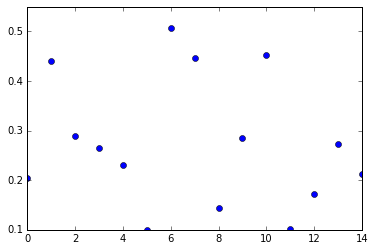

In [72]:
plt.plot(f['q10']['asym'].value,'o')
print f['q10'].keys()

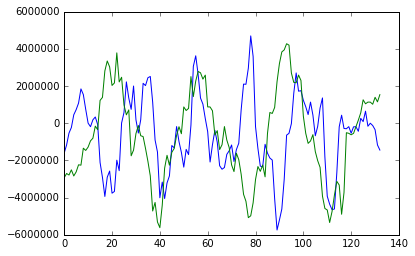

In [77]:
num_phi = f['q10']['ave_clus_cor'].shape[1]
phi_offset = 15
plt.plot(f['q10']['ave_clus_cor'][5,phi_offset:num_phi/2-phi_offset])
plt.plot(f['q10']['ave_clus_cor'][1,phi_offset:num_phi/2-phi_offset])